In [1]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import winsound
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
import glob as glob

#parameters
fRate = 1000/30.0
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysis_time = 2000.0 # in ms
analysis_time = int(np.ceil(analysis_time/fRate))
simulationDur_ms = 350.0 # in ms
simulationDur = int(np.ceil(simulationDur_ms/fRate))

#paths

savefigpath  = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'



Env: clapfcstimulation
Sensory responsive cell number:4032


In [ ]:
# BEHAVIOR: Sample animal plot
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
# recordingDate = info.recordingList.recordingDate
# recordingDate[indList]
s_animalID = 22107
s_stimuliID = 5 # For training sessions 
indList = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
indList = indList[0]
if s_animalID == 22101:
    indList = indList[:-2]
elif s_animalID == 22102:
    indList = indList[:-3]
fRate = 20000

    
# Create behaviour sessions plots
animal_lick  =[]
animal_water =[]
for ind in (indList):
    savepathname = info.recordingList.analysispathname[ind]
    pathname = [f for f in glob.glob(savepathname + 'training-paq-data.pkl')]
    paqData = pd.read_pickle (pathname[0])
    # Get the stim start times 
    trialStartTimes = utils.paq_data (paqData, 'maskerLED', 1, threshold_ttl=True)

    trialStartTimes = trialStartTimes - (2*fRate)

    if len(trialStartTimes)<500:
        licks, trial_licks = utils.lick_binner(savepathname, trialStartTimes,'lickDetection', stimulation = False)
        waterPoints, trial_water = utils.lick_binner(savepathname,trialStartTimes, 'waterDelivery', stimulation = False)

        animal_lick = animal_lick + trial_licks
        animal_water = animal_water + trial_water

fig = plt.figure(str(ind))
for i, array in enumerate(animal_lick):
    plt.plot(array, np.ones_like(array)+i, 'k.',markersize = 1)
    plt.plot(animal_water[i], np.ones_like(animal_water[i])+i+0.3, 'bo',markersize = 2)
                
plt.xlim(0, 8*fRate)
ymax = 900

plt. ylim(0, ymax)
plt.yticks(range(0,ymax, 150), range(ymax,0, -150))
plt.xticks (range(0,(8*fRate)+1,fRate), range(-2,7,1))
plt.ylabel('Trials')
plt.xlabel('Time (sec)')
plt.title(str(s_animalID))
savepathname = 'C:\\Users\\Huriye\Documents\\code\\clapfcstimulation\\figs\\'
pfun.save_figure( 'Figure3_ExampleAnimalBeh',savepathname)
plt.close(fig)


In [32]:
indListAll[:2]


array([340, 349], dtype=int64)

2312
(array([340, 349, 358, 367, 376, 384, 387, 396, 405, 414, 423, 432, 441,
       472], dtype=int64),)
340
C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2023-08-21_2312_001\
['C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\2023-08-21_2312_001\\training-paq-data.pkl']
349
C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2023-08-22_2312_001\
['C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\2023-08-22_2312_001\\training-paq-data.pkl']
432
C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2023-09-02_2312_001\
['C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\2023-09-02_2312_001\\training-paq-data.pkl']
441
C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2023-09-04_2312_001\
['C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\2023-09-04_2312_001\\training-paq-data.pkl']


ValueError: x and y must have same first dimension, but have shapes (79,) and (1,)

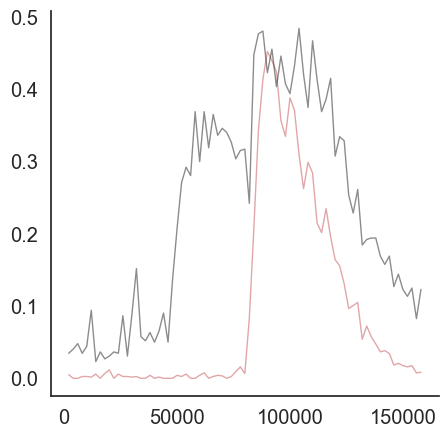

In [12]:
# BEHAVIOR: Average lick plot during learning
    
# BEHAVUIOR SAMPLE TRAINED ANIMAL
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
    
animalList = [2303, 2304, 22101, 22103, 22104, 22105, 22106, 22107]

fRate = 20000
s_stimuliID = 5 # For training sessions
types = ['Last Sessions', 'First Sessions']

fig = plt.figure()
pfun.set_figure()

# Create behaviour sessions plots
titleNames = [ 'Chrimson', ' OPN3']
for titleName in titleNames:  # This outer loop runs twice
    for s_animalID in animalList: 
        print(s_animalID)
        indList = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
        indListAll = indList[0]
        print(indList)
        if s_animalID == 22101:
            indListAll = indListAll[:-2]
        elif s_animalID == 22102:
            indListAll = indListAll[:-3]
        elif s_animalID == 22103:
            indListAll = indListAll[2:]
        elif s_animalID <2400:
            indListAll = indListAll[:-1]

        for type in types:
            if type == 'Last Sessions':
                indList = indListAll[-2:]
                colorV = 'r'
            elif type == 'First Sessions':
                indList = indListAll[:2]
                colorV = 'k'
            animal_lick  =[]
            animal_water =[]
            for ind in (indList):
                print(ind)
                savepathname = info.recordingList.analysispathname[ind]
                print(savepathname)
                pathname = [f for f in glob.glob(savepathname + 'training-paq-data.pkl')]
                print(pathname)
                paqData = pd.read_pickle (pathname[0])
                # Get the stim start times 
                trialStartTimes = utils.paq_data (paqData, 'maskerLED', 1, threshold_ttl=True)

                trialStartTimes = trialStartTimes - (2*fRate)

                if len(trialStartTimes)<500:
                    licks, trial_licks = utils.lick_binner(savepathname, trialStartTimes,'lickDetection', stimulation=False)
                    animal_lick = animal_lick + trial_licks
            
            bin_width = 10  # Adjust this value to change the width of each bin
            num_bins = range(0, 8*fRate, int(fRate/bin_width))
        
            animal_hist = np.zeros(len(num_bins)-1)
            for i, array in enumerate(animal_lick):
                hist, bins = np.histogram(array, bins=num_bins, range=(0, 8*fRate))
                animal_hist = animal_hist + hist
            animal_hist = animal_hist/ (i+1)/bin_width
            plt.plot( bins[1:],animal_hist, colorV, linewidth =1, alpha= 0.5)

            if type == 'First Sessions':
                if s_animalID == animalList[0]:
                    animal_hist_FirstAll = animal_hist
                else:
                    animal_hist_FirstAll = np.vstack((animal_hist_FirstAll,animal_hist))
            else:
                if s_animalID == animalList[0]:
                    animal_hist_LastAll = animal_hist
                else:
                    animal_hist_LastAll = np.vstack((animal_hist_LastAll,animal_hist))

    plt.plot( bins[1:],np.mean(animal_hist_LastAll,0 ), 'r', linewidth =3, alpha= 1, label = 'Last Sessions')
    plt.plot( bins[1:],np.mean(animal_hist_FirstAll,0), 'k', linewidth =3, alpha= 1, label = 'First Sessions')
    plt.legend()
    plt.xlim(0, 8*fRate)
    plt.xticks (range(0,(8*fRate)+1,fRate), range(-2,7,1))
    plt.ylabel('Lick Density')
    plt.xlabel('Time (sec)')
    plt.title('All animals')
    savepathname = 'C:\\Users\\Huriye\Documents\\code\\clapfcstimulation\\figs\\'
    pfun.save_figure( 'AverageLickDensity_'+titleName ,savepathname)

    # Change animal List and run again
    animalList =  list(range(2306, 2313, 1))

# Make a beep sound when the code is done
winsound.Beep(1000, 500)

514
C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2023-09-10_2306_001\
['optoStimTimes how many?:5120']
optoStimTimes how many?:64
trialStartTimes how many?:90
(array([ 0,  1,  2,  3,  5,  6,  7,  9, 11, 14, 16, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 45,
       47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66, 68,
       70, 72, 73, 76, 78, 80, 81, 82, 83, 84, 86, 87, 88], dtype=int64),)
1
516
C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2023-09-10_2307_002\
['optoStimTimes how many?:5120']
optoStimTimes how many?:64
trialStartTimes how many?:90
(array([ 0,  1,  2,  3,  5,  6,  7,  9, 11, 14, 16, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 45,
       47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66, 68,
       70, 72, 73, 76, 78, 80, 81, 82, 83, 84, 86, 87, 88], dtype=int64),)
1
518
C:\Users\Huriye\Documents\code\clapfcstimulati

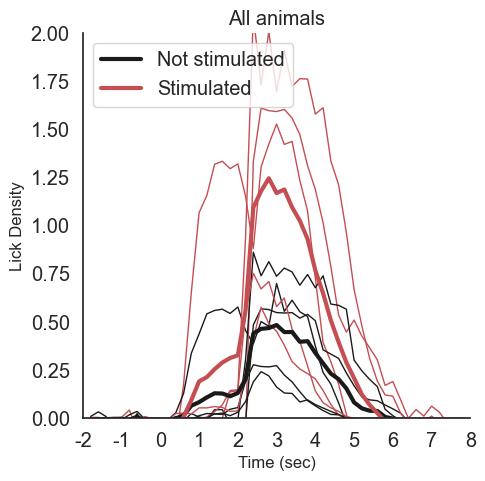

In [116]:
# BEHAVIOR: Average lick plot for cue stimulated sessions 
    
# BEHAVUIOR SAMPLE TRAINED ANIMAL
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
    
animalList = [2311] # for Chrimson 2303 is problematic check at some point
animalList = [2306, 2307,2308,2310,2312] # for OPN
fRate = 20000
s_stimuliID = 3# 3 for cue, 4 for reward stimulation 
types = ['Stimulated', 'Not stimulated']
duration = 10 # second -2 to 8 sec
bin_width = 5# Adjust this value to change the width of each bin

#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))
pfun.set_figure()


# Create behaviour sessions plots
for s_animalID in animalList: 
    ind = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
    if s_animalID ==2308:
        ind = ind[0][1]   # First file is broken
    else:
        ind = ind[0][0]
    print(ind)

    savepathname = info.recordingList.analysispathname[ind]
    print(savepathname)
    pathname = [f for f in glob.glob(savepathname + 'paq-data.pkl')]
    paqData = pd.read_pickle (pathname[0])
    # Get the stim start times 
    trialStartTimes = utils.paq_data (paqData, 'maskerLED', 1, threshold_ttl=True)
    optoStimTimes = utils.paq_data (paqData, 'optoLoopback', 1, threshold_ttl=True)
    print(['optoStimTimes how many?:' + str(len(optoStimTimes))])
    # Clean the triggers from stimulation frequencies
    first_ind = np.where(np.diff(optoStimTimes)>1*fRate)
    first_ind = np.concatenate(([0], first_ind[0]+1))
    optoStimTimes = np.array(optoStimTimes)
    optoStimTimes = optoStimTimes[first_ind]
    if s_animalID<2305:
        if s_stimuliID==3:
            s_stimuliID =4
        else:
            s_stimuliID = 3
    if s_stimuliID ==3:
        optoStimTimes = optoStimTimes - (2*fRate)
    elif s_stimuliID ==4:
        if s_animalID ==22101 or s_animalID ==2311 or s_animalID ==2312:
            optoStimTimes = optoStimTimes -1
        else:
            optoStimTimes = optoStimTimes

    print('optoStimTimes how many?:' + str(len(optoStimTimes)))
    print('trialStartTimes how many?:' + str(len(trialStartTimes)))
    if s_animalID ==22107:
        trialStartTimes = trialStartTimes[1:75]
    
    common_indices = np.where(np.isin(trialStartTimes, np.intersect1d(trialStartTimes, optoStimTimes)))
    print(common_indices)
    not_common_indices = np.where(np.isin(trialStartTimes, np.setdiff1d(trialStartTimes, optoStimTimes)))
    print(len(not_common_indices))

    trialStartTimes = trialStartTimes - (2*fRate)
    

    licks, trial_licks = utils.lick_binner(savepathname, trialStartTimes,'lickDetection')
    animal_lick = trial_licks


    num_bins = range(0, duration*fRate, int(fRate/bin_width))
       
    animal_hist = np.zeros(len(num_bins)-1)
    for i in np.nditer(common_indices):
        array = animal_lick[i]
        hist, bins = np.histogram(array, bins=num_bins, range=(0, duration*fRate))
        animal_hist = animal_hist + hist
    animal_hist = animal_hist/(i+1)/bin_width
    animal_hist = animal_hist - np.median(animal_hist[0:(2*fRate)],0)
    plt.plot( bins[1:],animal_hist, 'r', linewidth =1)

    if s_animalID == animalList[0]:
        animal_hist_FirstAll = animal_hist
    else:
        animal_hist_FirstAll = np.vstack((animal_hist_FirstAll,animal_hist))

    animal_hist = np.zeros(len(num_bins)-1)
    for i in np.nditer(not_common_indices):
        array = animal_lick[i]
        hist, bins = np.histogram(array, bins=num_bins, range=(0, duration*fRate))
        animal_hist = animal_hist + hist
    animal_hist = animal_hist/ (i+1)/bin_width
    animal_hist = animal_hist - np.median(animal_hist[0:(2*fRate)],0)
    plt.plot( bins[1:],animal_hist, 'k', linewidth =1)

    if s_animalID == animalList[0]:
        animal_hist_LastAll = animal_hist
    else:
        animal_hist_LastAll = np.vstack((animal_hist_LastAll,animal_hist))

plt.plot( bins[1:],np.mean(animal_hist_LastAll,0 ), 'k', linewidth =3, alpha= 1, label = 'Not stimulated')
plt.plot( bins[1:],np.mean(animal_hist_FirstAll,0), 'r', linewidth =3, alpha= 1, label = 'Stimulated')
plt.legend()
plt.xlim(0, duration*fRate)
plt.xticks (range(0,(duration*fRate)+1,fRate), range(-2,duration-1,1))
plt.ylabel('Lick Density')
plt.xlabel('Time (sec)')
plt.title('All animals')
plt.ylim(0, 2)

savepathname = 'C:\\Users\\Huriye\Documents\\code\\clapfcstimulation\\figs\\'
if  s_stimuliID==3: # Reward   
    pfun.save_figure( 'Figure3_AverageLickDensity-RewardStimulation',savepathname)
else:
    pfun.save_figure( 'Figure3_AverageLickDensity-CueStimulation',savepathname)
plt.close(fig)
        



In [100]:
duration

10